# Neural Network From Scratch

This notebook provides an intuitive understanding of the mechanism of the neural network, or deep learning.

Important steps in neural network:

- forward propagation
    - matrix multiplication
    - weights, biases, and activation functions
- back propagation
    - derivatives and partial derivatives
    - chain rules
- gradient descent 
    - Batch
    - Mini-batch
    - Stochastic gradient descent

---

![](../images/neural-network-sample.png)

---

In [1]:
import numpy as np
import matplotlib.pylab as plt

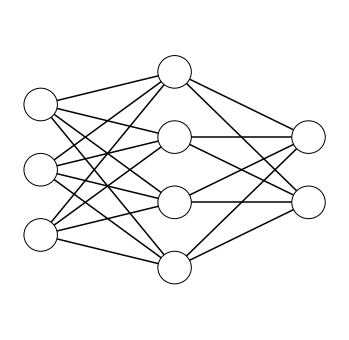

In [2]:
from draw_neural_net import draw_neural_net
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [3, 4, 2])

In [3]:
## Methods to create neural network diagram

# from draw_neural_net2 import draw_neural_net3
# fig = plt.figure(figsize=(12, 12))
# ax = fig.gca()
# ax.axis('off')
# draw_neural_net3(ax, .1, .9, .1, .9, [2,2],
#                 coefs_=[np.array([[0.4,0.5],[0.1,0.2]])],
#                 intercepts_=[np.array([99,99])],
#                # np=np, plt = plt,
#                 n_iter_ = 1, loss_=0.4)


In [4]:
# %load_ext tikzmagic

In [5]:
# %%tikz -f svg

# \tikzset{every node/.style={font=\sffamily,white}}

# \node[fill=red] at (0,0) (a) {This};
# \node[fill=blue] at (2,0) (b) {That};
# \draw[->] (a) -- (b);

## Linear Algebra and Matrix

- 2D matrix

$$
\begin{pmatrix}
1&2 \\
3&4 \\
5&6 \\
\end{pmatrix}
$$

- Matrix Multiplication


$$\begin{pmatrix}
1&2 \\
3&4 \\
\end{pmatrix}
\begin{pmatrix}
5&6 \\
7&8
\end{pmatrix} =
\begin{pmatrix}
19&22 \\
43&50
\end{pmatrix}
$$

## Activation Functions

In neural network, the activation function of a node determines whether the node would activate the output given the input values. Different types of activation functions may determine the cut-offs for output activation in different ways.

- sigmoid function

$$ h(x) = \frac{1}{1 + \exp(-x)}$$

- step function

$$ h(x)= \left\{ 
     \begin{array}\\
     0 & (x \leq 0) \\
     1 & (x > 0)
     \end{array}
\right.
$$

- ReLU function

$$ h(x)= \left\{ 
     \begin{array}\\
     x & (x > 0) \\
     0 & (x \leq 0)
     \end{array}
\right.
$$

- Softmax function


$$
y_k = \frac{\exp(a_k)}{\sum_{i = 1}^{n} {a_i}}
$$

In [6]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)


# def softmax(x):
#     exp_x = np.exp(x)
#     sum_exp_x = np.sum(exp_x)
#     y = exp_x/sum_exp_x
#     return y

def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x-c) # avoid overflow issues
    sum_exp_x = np.sum(exp_x)
    y = exp_x/sum_exp_x
    return y

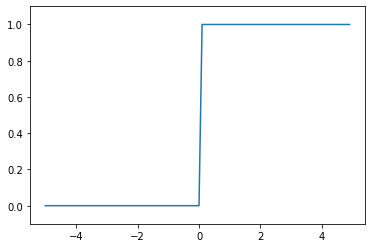

In [7]:
# step function
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, step_function(x))
plt.ylim(-0.1, 1.1)
plt.show()

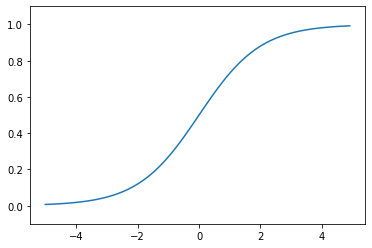

In [8]:
## sigmoid function
plt.plot(x, sigmoid(x))
plt.ylim(-0.1, 1.1)
plt.show()

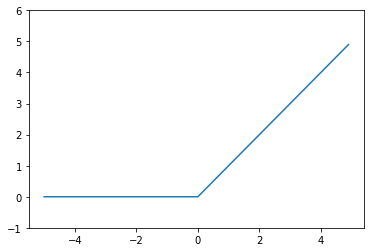

In [9]:
# ReLU
plt.plot(x, relu(x))
plt.ylim(-1, 6)
plt.show()

## Forward Propagation

- Given a two-layer network, with two input values $x1$ and $x2$, to get the values of the three outputs in the second layer, $y1$, $y2$, $y3$, we compute the dot product of the *X* and *W*.
    - *X* refers to the input vector/matrix
    - *W* refers to the network weights, which is a 2 x 3 matrix in the current example
    - Each link is a weight and the network consists of a 2 x 3 Weight Matrix *W*
- Taking the dot product of the input values *X* and the weight matrix *W* is referred to as the **forward propagation** of the network. 

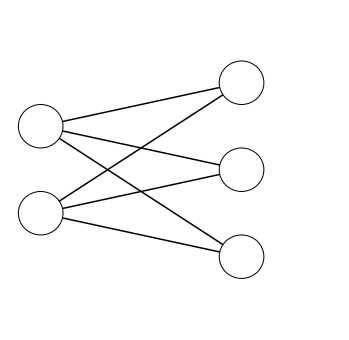

In [10]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .7, .1, .9, [2, 3])

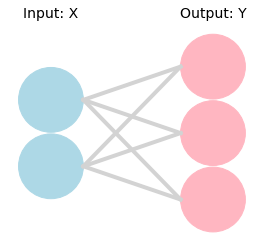

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [11]:
from nnv import NNV

layersList = [
    {"title": "Input: X", "units": 2, "color": "lightBlue"},
    {"title": "Output: Y", "units": 3, "color": "lightpink"},
    #{"title": "Labels", "units": 2, "color": "lightpink"},
]

NNV(layersList, font_size=14).render()

In [12]:
X = np.array([1,2])
X.shape

(2,)

In [13]:
W = np.array([[1,3,5],[2,4,6]])
W.shape

(2, 3)

In [14]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


## Weights, Biases, and Activation Functions

- The output of a node in the network is computed as the sum of the weighted inputs and the bias:

$$ a^{(1)}_1 = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1$$

- Then the output values go through the activation function and this result would indicate the final output of the node.

$$ z^{(1)}_1= h(a^{(1)}_1) $$

- Not all the nodes need to have an activation function.

In [15]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [16]:
A1 = np.dot(X, W1) + B1
print(A1)


Z1 = sigmoid(A1)
print(Z1)

Z2 = softmax(A1)
print(Z2)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
[0.21198272 0.31624106 0.47177622]


## Learning and Training

- Forward propagation shows how the network takes the input values and produce the output values based on the network parameters (i.e., weights).
- The network needs to learn the weights that best produce the output values according to some loss function.

## Loss Function on One Sample

- Mean Square Error 

$$E = \frac{1}{2}\sum(y_k - t_k)^2$$

- Cross Entropy Error

$$E= -\sum_{k}t_k\log(y_k)$$

In [17]:
def mean_square_error(y, t):
    return(0.5 * np.sum((y-t)**2))

def cross_entropy_error(y, t):
    delta = 1e-7 # avoid log(0)
    return -np.sum(t * np.log(y + delta))

In [18]:
## mean square error
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # predicted values
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # true label
print(mean_square_error(np.array(y),  np.array(t)))
print(cross_entropy_error(np.array(y), np.array(t)))

0.09750000000000003
0.510825457099338


## Loss Function on Batch Samples

- If the training goes based on a small batch size *N*, we can compute the average loss of the batch sample:

$$ E = - \frac{1}{N}\sum_n\sum_k t_{nk}\log y_{nk}$$

## Stochastic Gradient Descent

## References

- [Deep Learning From Scratch](https://www.books.com.tw/products/0010761759)
- [史上最完整機器學習自學攻略！我不相信有人看完這份不會把它加進我的最愛](https://buzzorange.com/techorange/2017/08/21/the-best-ai-lesson/)